<a href="https://www.kaggle.com/code/deepakkaura/fiverr-capstone-project?scriptVersionId=114460538" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ***Capstone Project on Fiverr's Potential Spammers Prediction***


### By Deepak Kaura

## **Problem statement -** 

Recently attackers are using freelance job sites such as Fiverr to distribute malware disguised as job offers. These job offers contain attachments that pretend to be the job brief but are actually installers for keyloggers such as Agent Tesla or Remote Access Trojan (RATs). Due to this many users lost their earnings, bidding fees and fake client projects, also some users lost their accounts too. Many of my LinkedIn connections faced it and some of them lost their professional growth, side income and stability.

Just after a month of this attack Fiverr come-up with a Kaggle competition on this to understand how data science people will solve this problem by using their differ methods and techniques. 




**Objective : -**  Find a good fit algorithm which will have Potential to Predict Spammers. 


## **Importing Libraries**

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Uploading and Reading the file by checking its first 7 lines**

In [ ]:
df_fiv =pd.read_csv('fiverr_data.csv')

df_fiv.head(7)

,label,user_id,X1,X2,X3,X4,X5,X6,X7,X8,...,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51
0,0,1,20972,14,13,3,11,1,2,15,...,0,0,0,0,0,0,0,0,1,0
1,0,2,7362,213,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
2,0,3,21216,215,71,3,11,1,2,15,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2261,212,71,2,8,1,2,15,...,0,0,0,0,0,0,0,1,0,0
4,0,5,4543,213,71,2,8,1,2,15,...,0,0,0,0,0,0,0,0,0,0
5,0,6,7353,213,13,3,11,1,2,15,...,1,0,0,0,0,0,0,1,0,0
6,0,7,13668,213,71,2,8,1,2,15,...,0,0,0,0,0,0,0,1,0,0


## **Checking the data types of the each column**

In [ ]:
df_fiv.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 426422 entries, 0 to 426421

Data columns (total 53 columns):

 #   Column   Non-Null Count   Dtype  

---  ------   --------------   -----  

 0   label    426422 non-null  int64  

 1   user_id  426422 non-null  int64  

 2   X1       426422 non-null  int64  

 3   X2       426422 non-null  int64  

 4   X3       426422 non-null  int64  

 5   X4       426422 non-null  int64  

 6   X5       426422 non-null  int64  

 7   X6       426422 non-null  int64  

 8   X7       426422 non-null  int64  

 9   X8       426422 non-null  int64  

 10  X9       426422 non-null  int64  

 11  X10      426422 non-null  int64  

 12  X11      426422 non-null  int64  

 13  X12      426422 non-null  int64  

 14  X13      426416 non-null  float64

 15  X14      426422 non-null  int64  

 16  X15      426422 non-null  int64  

 17  X16      426422 non-null  int64  

 18  X17      426422 non-null  int64  

 19  X18      426422 non-null  int64  

 20  X

## **Checking the Statistical Summary**

In [ ]:
df_fiv.describe().round().T

,count,mean,std,min,25%,50%,75%,max
label,426422.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
user_id,426422.0,224319.0,129596.0,1.0,112055.0,224162.0,336765.0,448784.0
X1,426422.0,10819.0,7072.0,1.0,4657.0,11574.0,16326.0,24234.0
X2,426422.0,155.0,68.0,1.0,95.0,189.0,213.0,222.0
X3,426422.0,28.0,19.0,1.0,13.0,14.0,37.0,94.0
X4,426422.0,2.0,1.0,1.0,2.0,3.0,3.0,3.0
X5,426422.0,11.0,6.0,1.0,8.0,11.0,16.0,17.0
X6,426422.0,3.0,1.0,1.0,3.0,3.0,4.0,4.0
X7,426422.0,5.0,3.0,1.0,2.0,5.0,8.0,11.0
X8,426422.0,16.0,5.0,1.0,14.0,15.0,21.0,29.0


## **Checking the length of the dataset**

In [ ]:
df_fiv.shape

(458798, 53)

### **Counting the Spammers and Non-Spammers from label column**

In [ ]:
print('number of each value in label \n' ,df_fiv['label'].value_counts())

number of each value in label 

 0    446477

1     12321

Name: label, dtype: int64


***Seems we had 12321 Spammers and 446477 Non-Spammers in our dataset***

### **Countplot Visualization for Relationship b/w User_ID and Label (0 = Non-Spammers and 1 = Spammers)**

Text(0, 0.5, 'User_ID')

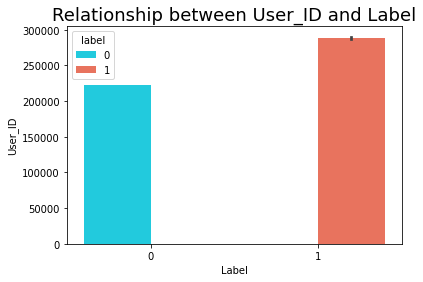

In [ ]:
sns.barplot(df_fiv['label'] , df_fiv['user_id'] ,hue=df_fiv['label'], palette =['#03e3fc', 'tomato'] )  
plt.title('Relationship between User_ID and Label' , size=18)
plt.xlabel('Label')
plt.ylabel('User_ID')

## **Checking the missing values**

In [ ]:
df_fiv.isnull().sum()

label      0
user_id    0
X1         0
X2         0
X3         0
X4         0
X5         0
X6         0
X7         0
X8         0
X9         0
X10        0
X11        0
X12        0
X13        6
X14        0
X15        0
X16        0
X17        0
X18        0
X19        0
X20        0
X21        0
X22        0
X23        0
X24        0
X25        0
X26        0
X27        0
X28        0
X29        0
X30        0
X31        0
X32        0
X33        0
X34        0
X35        0
X36        0
X37        0
X38        0
X39        0
X40        0
X41        0
X42        0
X43        0
X44        0
X45        0
X46        0
X47        0
X48        0
X49        0
X50        0
X51        0
dtype: int64

***Seems X13 column has 6 missing values***

## **Handling the missing values**

In [ ]:
print('mean of X13 =' ,df_fiv['X13'].mean())

mean of X13 = 0.08745357373275907


In [ ]:
print('median of X13 =' ,df_fiv['X13'].median())

median of X13 = 0.0


In [ ]:
print('mode of X13 =' ,df_fiv['X13'].mode())

mode of X13 = 0    0.0

dtype: float64


***Seems that this column contains max zeros and the missing values are least, so I chosen "Mode" to replace missing values***

In [ ]:
df_fiv['X13']=df_fiv['X13'].fillna(df_fiv['X13'].mode())

### **Correlation Matrix**

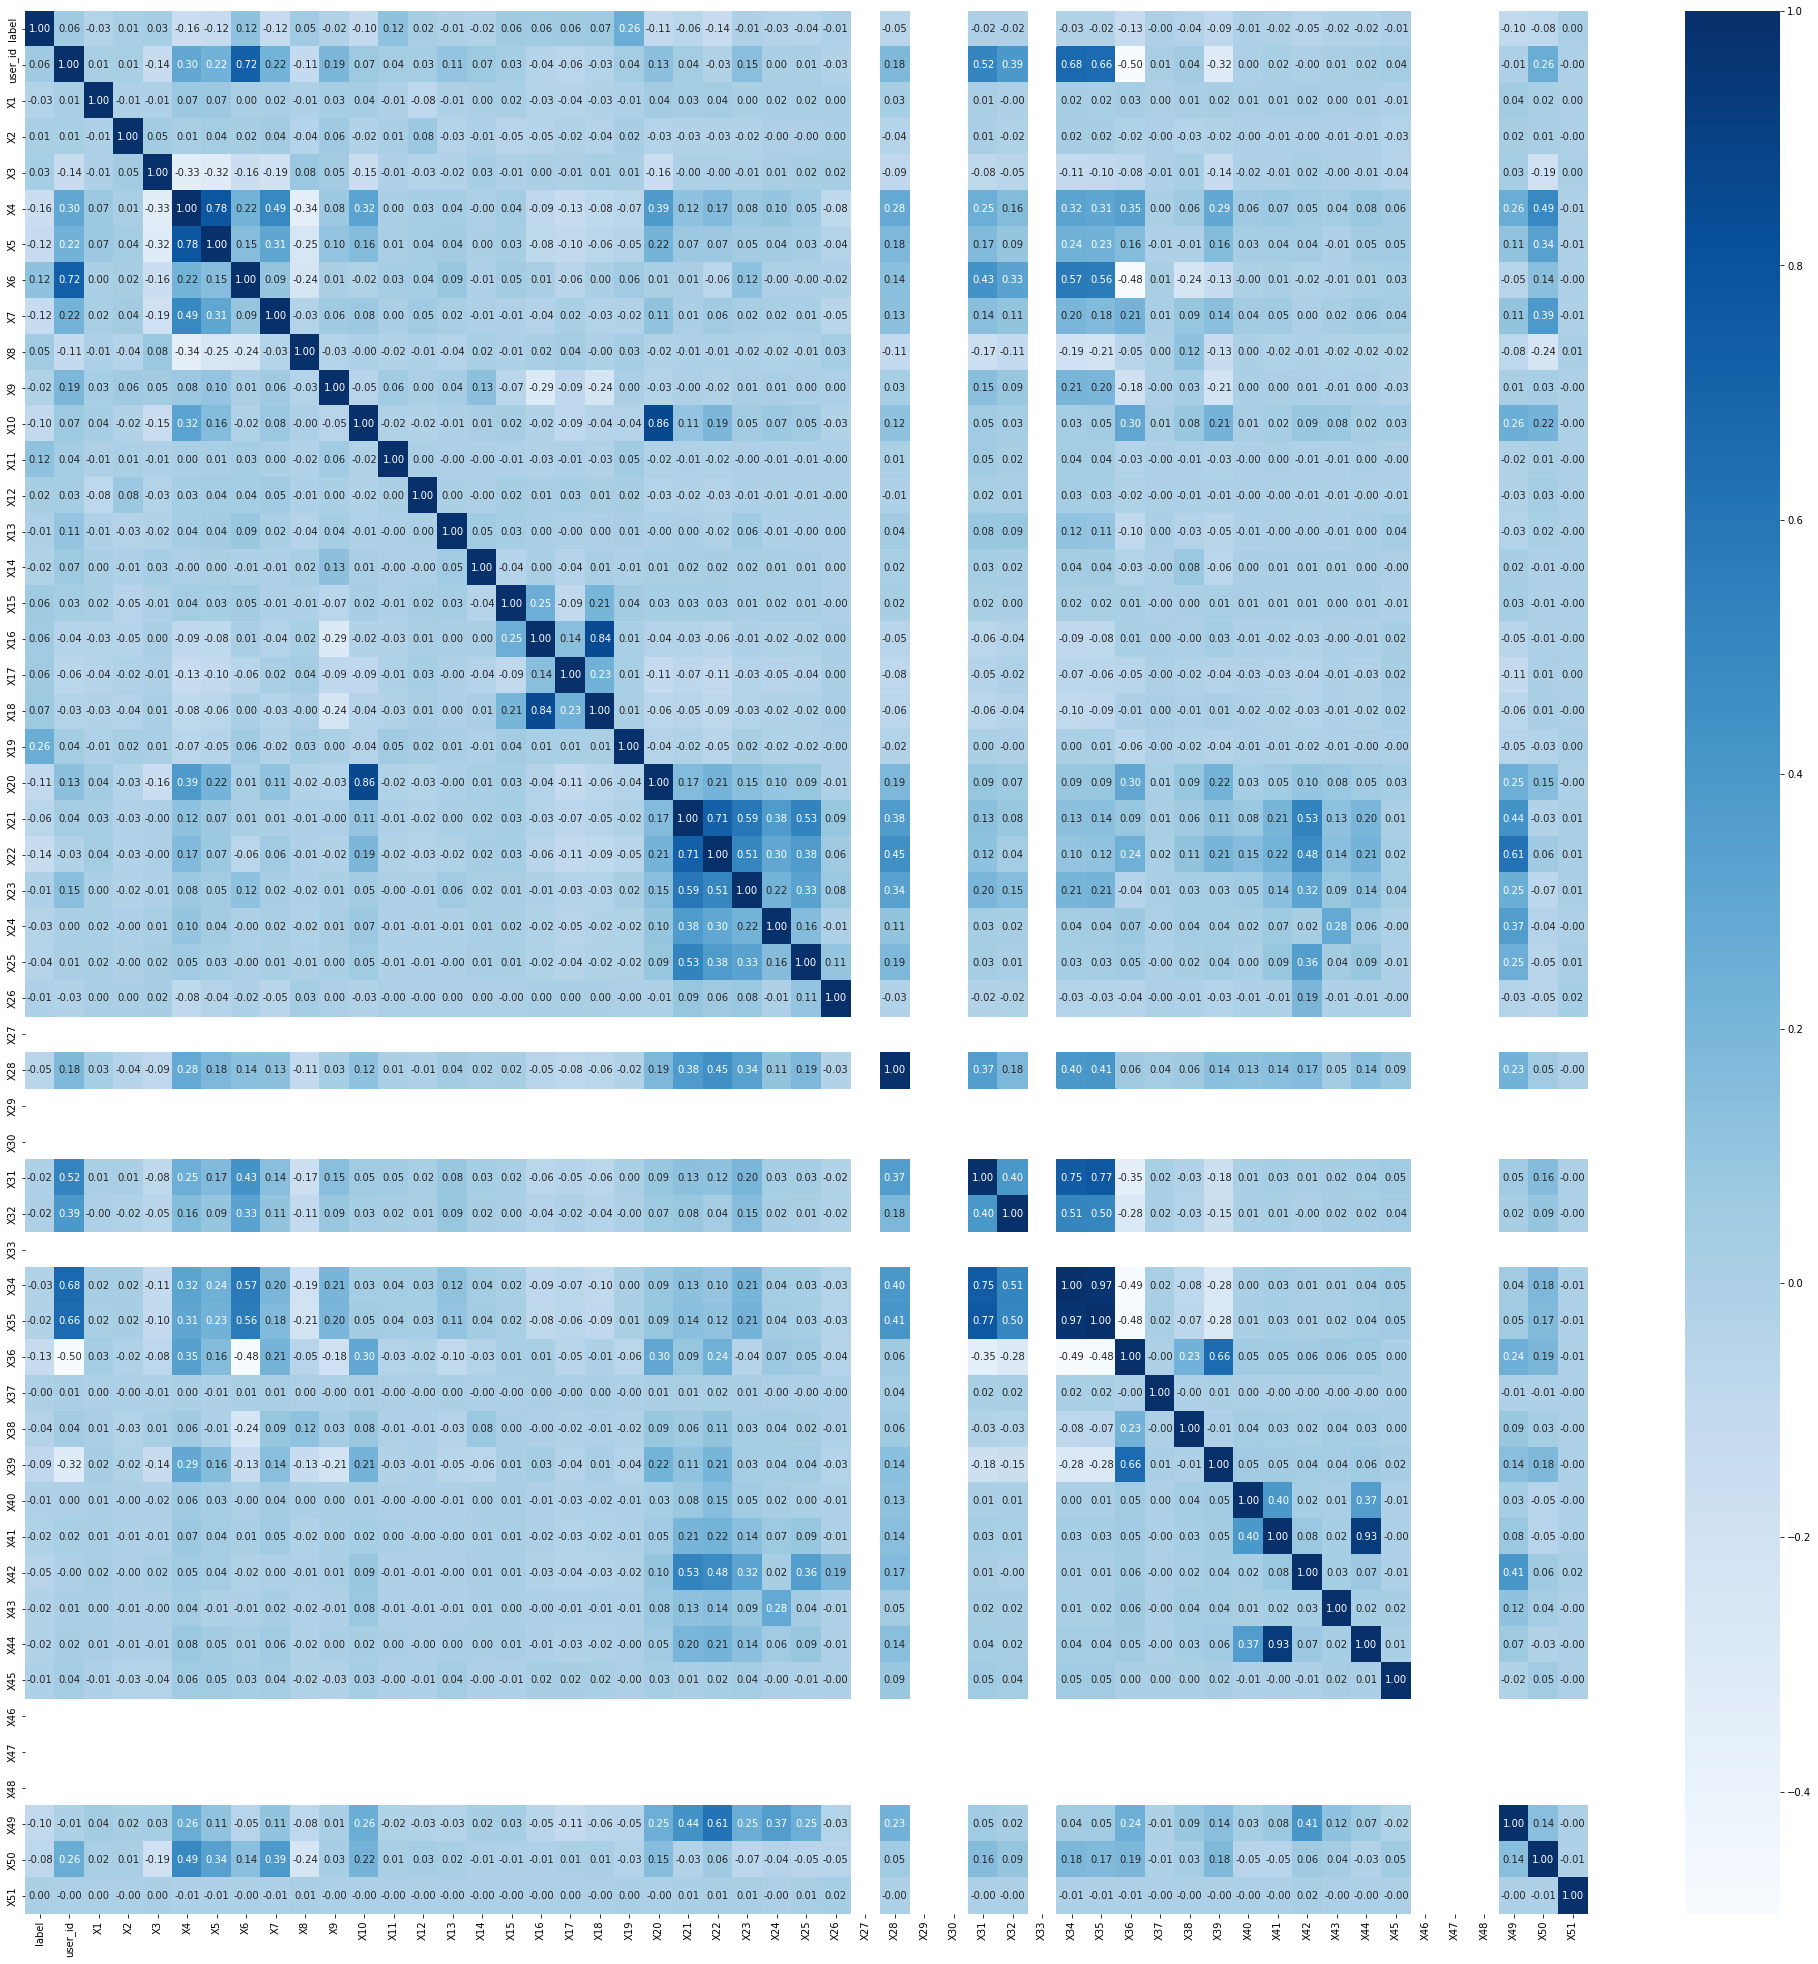

In [ ]:
plt.figure(figsize=(35,35))
sns.heatmap(df_fiv.corr() , annot=True,cmap=plt.cm.Blues, fmt='.2f')

### **Droping those columns/features who had blank/0 values**

In [ ]:
df_fiv.drop(columns=['X27','X29', 'X30', 'X33', 'X46', 'X47', 'X48'], inplace=True)

### **Correlation Matrix for those who had no 0 values**

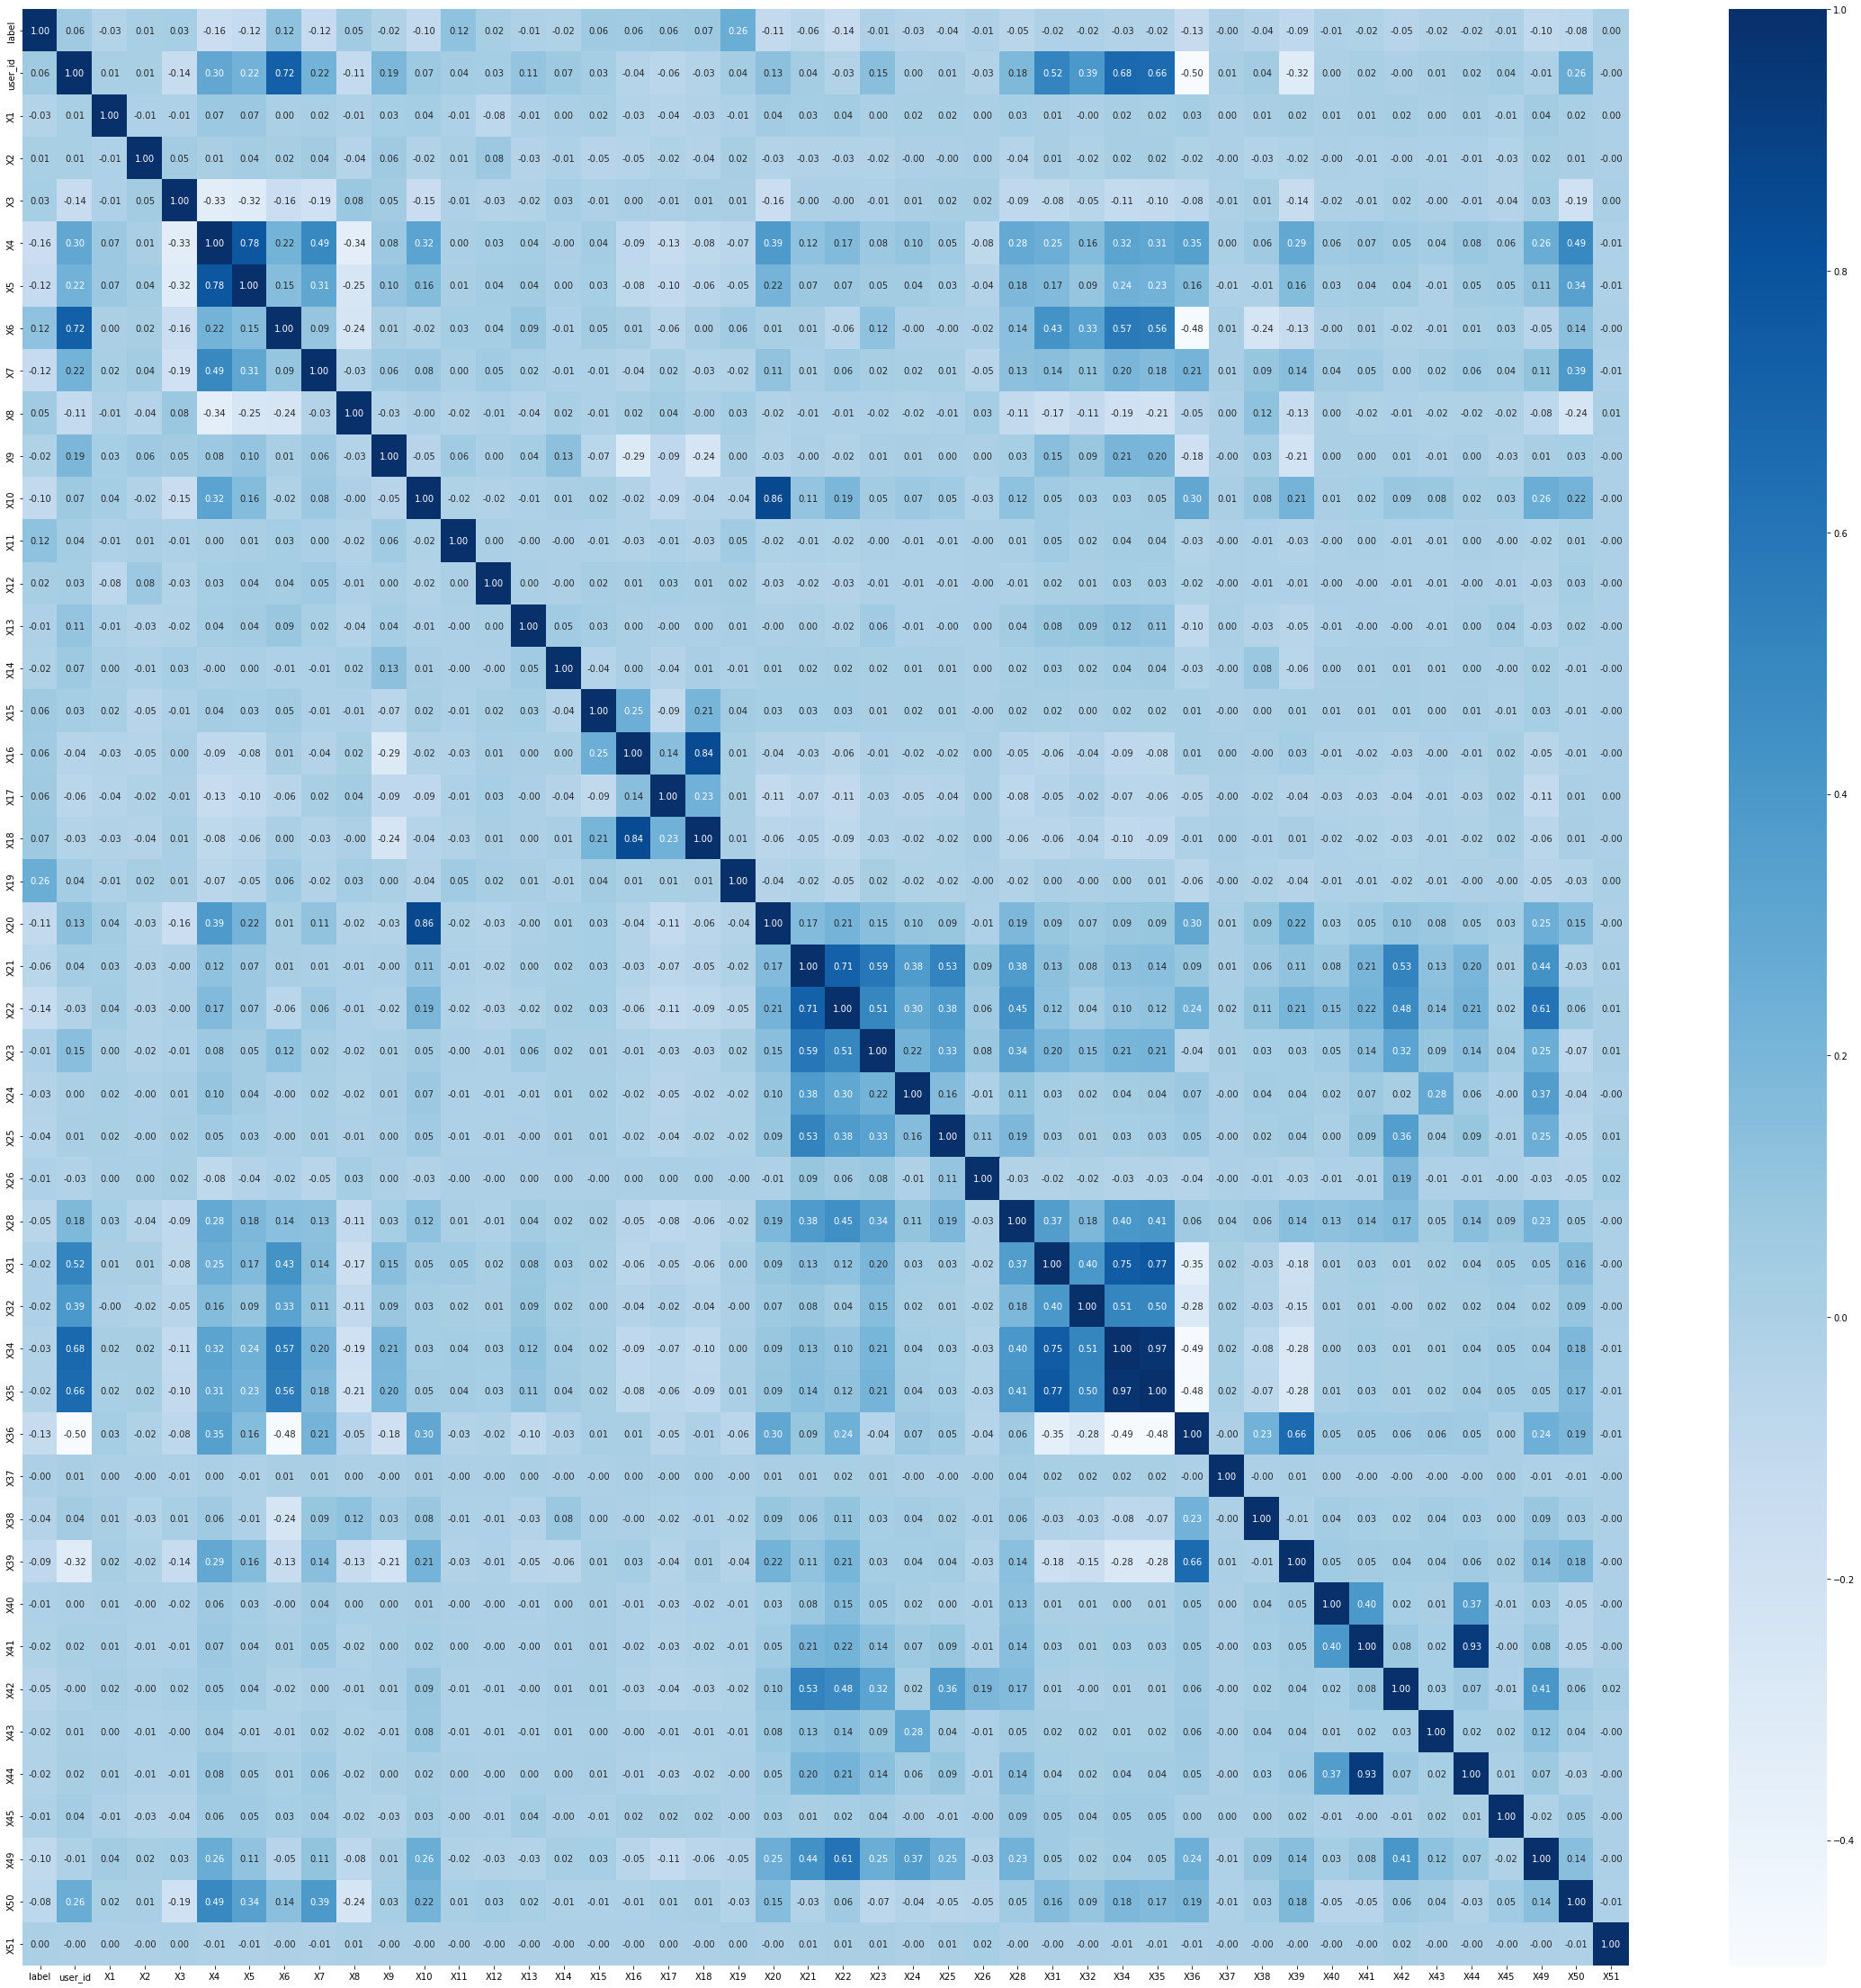

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(df_fiv.corr() , annot=True,cmap=plt.cm.Blues, fmt='.2f')

X 13 is a float value or contain a lot of 0 value, so float value cannot be trained if the have lot of 0 value. We have 2 method to tackle with : -

* drop value 

* change data type 

In [ ]:
df1= df_fiv.drop(columns='X13' , axis=1)

## **Split data**

In [ ]:
x = df1.iloc[:,1:]
y=df1.iloc[:,:1]

In [ ]:
print('shape of total data set  =', df_fiv.shape)
print('Shape of x data set  =', x.shape)
print('Shape of y data set  =', y.shape)

shape of total data set  = (458798, 46)

Shape of x data set  = (458798, 44)

Shape of y data set  = (458798, 1)


### **Train Train data**

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y ,test_size=0.2 , random_state=0)

In [ ]:
print('shape of x_train =' , x_train.shape)
print('shape of x_test =' , x_test.shape)
print('shape of y_train =' , y_train.shape)
print('shape of y_test =' , y_test.shape)

shape of x_train = (367038, 44)

shape of x_test = (91760, 44)

shape of y_train = (367038, 1)

shape of y_test = (91760, 1)


### **Model Building, Predict and solve**

Now we are ready to train a model and predict the required solution. 
Our problem is a classification and regression problem. We want to identify relationship between output (spam order or not) : - 

* Decision Tree Classifier

* Random Forest Classifier

* Logistic Regression

* XGBoost Classifier

* ExtraTree Classifier

#### **Decision Tree Classifier Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

dt_model=DecisionTreeClassifier().fit(x_train,y_train)

dt_pred= dt_model.predict(x_test)
dt_score = accuracy_score(y_test,dt_pred)
dt_score

0.974694856146469

#### **Classification Report of Decision Tree Classifier**

In [ ]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support



           0       0.99      0.99      0.99     89297

           1       0.53      0.57      0.55      2463



    accuracy                           0.97     91760

   macro avg       0.76      0.78      0.77     91760

weighted avg       0.98      0.97      0.98     91760




#### **Confusion Matrix of Decision Tree Classifier**

In [ ]:
import sklearn.metrics as metrics

cm_dt = metrics.confusion_matrix(y_test , dt_pred)
cm_dt

array([[88044,  1253],
       [ 1069,  1394]])

#### **Visualizing Decision Tree Classifier confusion matrix and accuracy score**

Text(0.5, 1.0, 'Decision tree model accuracy : 97.4694856146469% ')

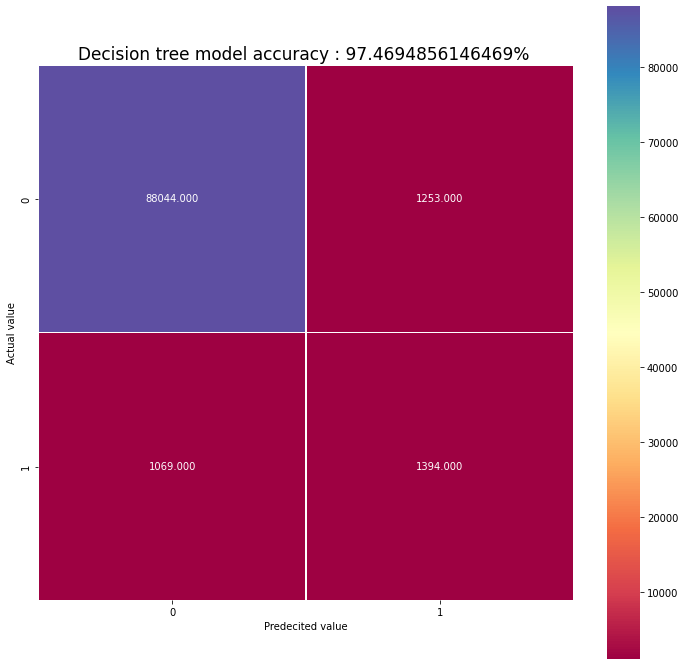

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_dt ,annot=True, fmt='.3f' , linewidths=.5 ,square=True , cmap='Spectral' )
plt.ylabel('Actual value')
plt.xlabel('Predecited value')
all_sample_title ='Decision tree model accuracy : {0}% '.format( dt_score * 100)
plt.title(all_sample_title, size  =17)

#### **Decision Tree Classifier : Confusion Matrix Results**


* True positive ("No Spammer" and predicted value "No Spammer") True prediction ------ 88044

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 1394

* False positive ("Spammer" and predicted value "No Spammer") Type-1 error ------- 1253

* False negative ("No Spammer" and predicted value "Spammer") Type-2 error ------ 1069

#### **Random Forest Classifier Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rfc = RandomForestClassifier(n_estimators=100, random_state=0)

rfc_model = rfc.fit(x_train, y_train)

rfc_pred= rfc_model.predict(x_test)

rfc_score = accuracy_score(y_test , rfc_pred)
rfc_score

0.9859742807323453

#### **Clasiification Report of Random Forest Classifier**

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support



           0       0.99      1.00      0.99     89297

           1       0.89      0.55      0.68      2463



    accuracy                           0.99     91760

   macro avg       0.94      0.77      0.83     91760

weighted avg       0.98      0.99      0.98     91760




#### **Random Forest Classifier confusion matrix**

In [ ]:
import sklearn.metrics as metrics

cm_rfc = metrics.confusion_matrix(y_test , rfc_pred)
cm_rfc

array([[89127,   170],
       [ 1117,  1346]])

#### **Visualize Random Forest Classifier confusion matrix and accuracy score**

Random Forest model accuray ( in %) :98.59742807323452


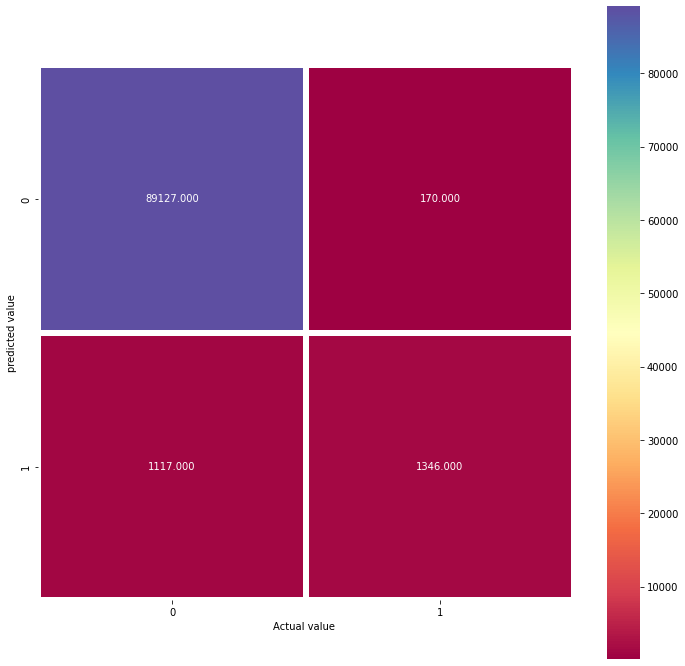

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_rfc , annot=True, fmt='.3f', linewidths=5 , square=True,cmap='Spectral')
plt.xlabel('Actual value ')
plt.ylabel('predicted value')
all_sample_title = 'Random Forest model accuray ( in %) :{0}'.format(rfc_score*100)
print(all_sample_title)
plt.show()

#### **Random Forest Classifier : Confusion Matrix Results**


* True positive ("No Spammer" and predicted value "No Spammer") True prediction ------ 89127

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 1346

* False positive ("Spammer" and predicted value "No Spammer") Type-1 error ------- 170

* False negative ("No Spammer" and predicted value "Spammer") Type-2 error ------ 1117

#### **Logistic Regression Model** 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression().fit(x_train,y_train)

lr_pred = lr_model.predict(x_test)

lr_score = accuracy_score(y_test , lr_pred)
lr_score

0.9744986922406277

#### **Classification Report of Logistic Regression**

In [ ]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support



           0       0.97      1.00      0.99     89297

           1       0.78      0.07      0.13      2463



    accuracy                           0.97     91760

   macro avg       0.88      0.53      0.56     91760

weighted avg       0.97      0.97      0.96     91760




#### **Logistic Regression confusion matrix**

In [ ]:
import sklearn.metrics as metrics

cm_lr = metrics.confusion_matrix(y_test , lr_pred)
cm_lr

array([[89249,    48],
       [ 2292,   171]])

#### **Visualize Logistic Regression confusin matrix and accuracy score**

Logistic Regression model accuray ( in %) :97.44986922406277


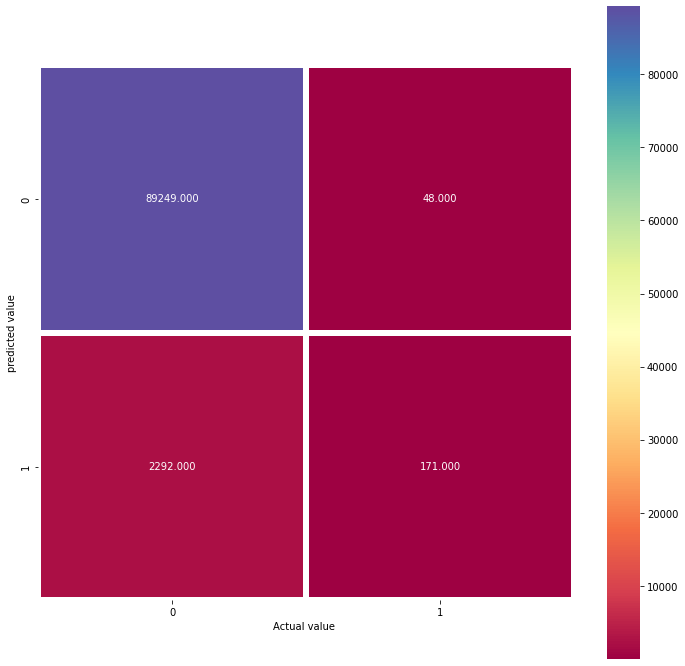

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_lr , annot=True, fmt='.3f', linewidths=5 , square=True,cmap='Spectral')
plt.xlabel('Actual value ')
plt.ylabel('predicted value')
all_sample_title = 'Logistic Regression model accuray ( in %) :{0}'.format(lr_score*100)
print(all_sample_title)
plt.show()

#### **Logistic Regression : Confusion Matrix Results**


* True positive ("No Spammer" and predicted value "No Spammer") True prediction ------ 89249

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 171

* False positive ("Spammer" and predicted value "No Spammer") Type-1 error ------- 48

* False negative ("No Spammer" and predicted value "Spammer") Type-2 error ------ 2292

#### **XGBoost Classifier Model**

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb_model = XGBClassifier().fit(x_train,y_train)

xgb_pred = xgb_model.predict(x_test)

xgb_score = accuracy_score(y_test , xgb_pred)
xgb_score

0.9829882301656495

#### **Classification Report of XGBoost Classifier**

In [ ]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support



           0       0.98      1.00      0.99     89297

           1       0.86      0.44      0.58      2463



    accuracy                           0.98     91760

   macro avg       0.92      0.72      0.79     91760

weighted avg       0.98      0.98      0.98     91760




#### **XGBoost Classifier confusion matrix**

In [ ]:
import sklearn.metrics as metrics

cm_xgb = metrics.confusion_matrix(y_test , xgb_pred)
cm_xgb

array([[89118,   179],
       [ 1382,  1081]])

#### **Visualize XGBoost Classifier confusion matrix and accuracy score**

XGBoost Classifier model accuray ( in %) :98.29882301656495


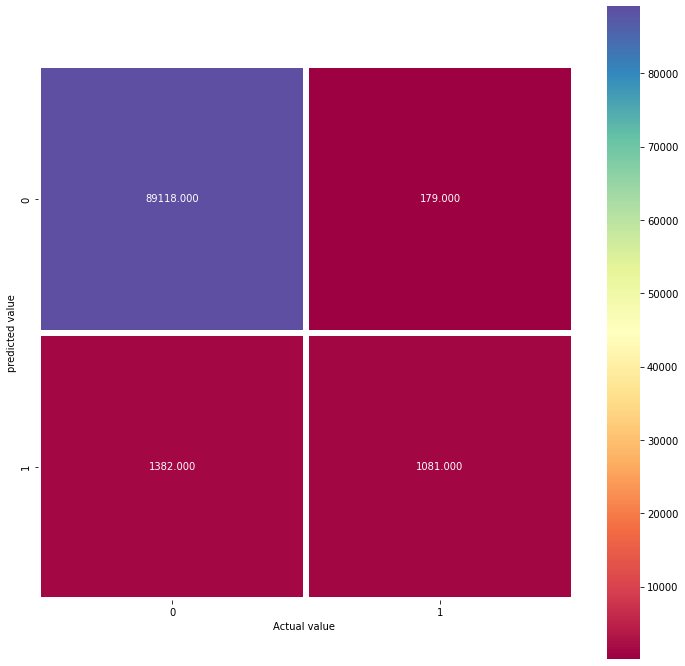

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_xgb , annot=True, fmt='.3f', linewidths=5 , square=True,cmap='Spectral')
plt.xlabel('Actual value ')
plt.ylabel('predicted value')
all_sample_title = 'XGBoost Classifier model accuray ( in %) :{0}'.format(xgb_score*100)
print(all_sample_title)
plt.show()

#### **XGBoost Classifier : Confusion Matrix Results**


* True positive ("No Spammer" and predicted value "No Spammer") True prediction ------ 89118

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 1801

* False positive ("Spammer" and predicted value "No Spammer") Type-1 error ------- 179

* False negative ("No Spammer" and predicted value "Spammer") Type-2 error ------ 1382

#### **Extra Tree Classifier Model**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

ExtraTree_model = ExtraTreesClassifier().fit(x_train,y_train)

ExtraTree_pred = ExtraTree_model.predict(x_test)

ExtraTree_score = accuracy_score(y_test , ExtraTree_pred)
ExtraTree_score

0.9854511769834351

#### **Classification Report of Extra Tree Classification**

In [ ]:
print(classification_report(y_test,ExtraTree_pred))

              precision    recall  f1-score   support



           0       0.99      1.00      0.99     89297

           1       0.89      0.52      0.66      2463



    accuracy                           0.99     91760

   macro avg       0.94      0.76      0.82     91760

weighted avg       0.98      0.99      0.98     91760




#### **Extra Tree Classification confusion matrix**

In [ ]:
import sklearn.metrics as metrics

cm_ExtraTree = metrics.confusion_matrix(y_test , ExtraTree_pred)
cm_ExtraTree

array([[89145,   152],
       [ 1183,  1280]])

#### **Visualize Extra Tree Classification confusion matrix and accuracy score**

Extra Tree Classifier model accuray ( in %) :98.5451176983435


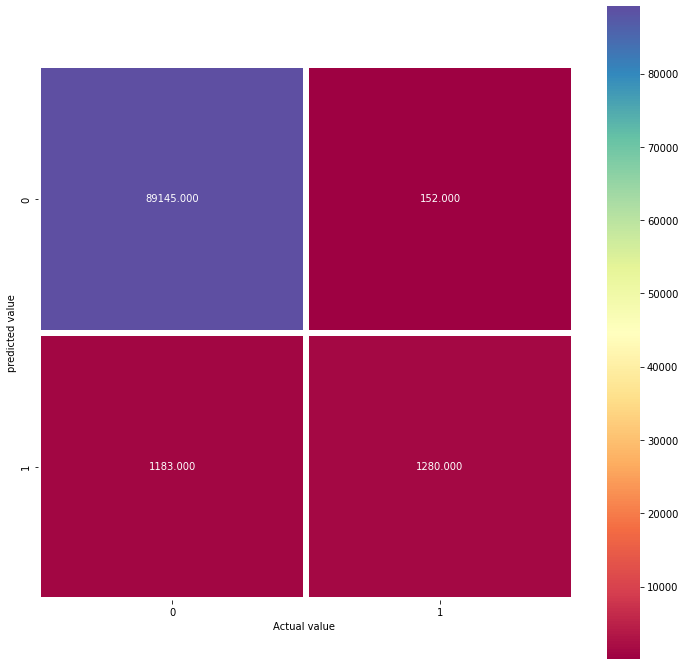

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm_ExtraTree , annot=True, fmt='.3f', linewidths=5 , square=True,cmap='Spectral')
plt.xlabel('Actual value ')
plt.ylabel('predicted value')
all_sample_title = 'Extra Tree Classifier model accuray ( in %) :{0}'.format(ExtraTree_score*100)
print(all_sample_title)
plt.show()

#### **Extra Tree Classifier : Confusion Matrix Results**


* True positive ("No Spammer" and predicted value "No Spammer") True prediction ------ 89145

* True negative ("Spamer" and predicted value "Spammer") True prediction ------ 1280

* False positive ("Spammer" and predicted value "No Spammer") Type-1 error ------- 152

* False negative ("No Spammer" and predicted value "Spammer") Type-2 error ------ 1183

## **Summarizing Model results and their performance, Visualization**

In [ ]:
models = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','Decision Tree','XGBoost Classifier', 'ExtraTree Classifier'],
                       'Score': [lr_score*100 , rfc_score*100, dt_score*100, xgb_score*100, ExtraTree_score*100]}).round(2)

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,98.60
4,ExtraTree Classifier,98.55
3,XGBoost Classifier,98.30
2,Decision Tree,97.46
0,Logistic Regression,97.45


### **Visulaizing models accuracy scores**

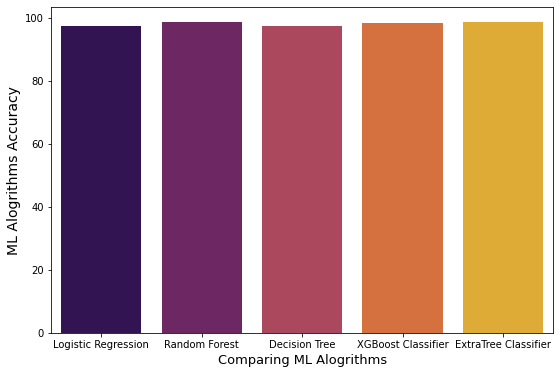

In [ ]:
# Defining the plotsize
plt.figure(figsize=(9, 6))

# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
plots = sns.barplot(x="Model", y="Score", data=models, palette='inferno')

# Setting the x-acis label and its size
plt.xlabel("Comparing ML Alogrithms", size=13)

# Setting the y-axis label and its size
plt.ylabel("ML Alogrithms Accuracy", size=14)

# Finallt plotting the graph
plt.show()

***Through this it's tough to select our best fit model, so below we will explore more parameters which will helps us to find right fit alogrithm*** 

### **False positive ("Spammer" and predicted value "No Spammer") Type-1 error**

let's visualize this to check that which model has lesser number of Type-1 error.

In [ ]:
models1 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','ExtraTree Classifier'],
                       'False Positives': [cm_dt[0,1],cm_rfc[0,1],cm_lr[0,1],cm_xgb[0,1], cm_ExtraTree[0,1]]})

models1.sort_values(by='False Positives', ascending=False)

,Model,False Positives
0,Decision Tree,1253
3,XGBoost Classifier,179
1,Random Forest,170
4,ExtraTree Classifier,152
2,Logistic Regression,48


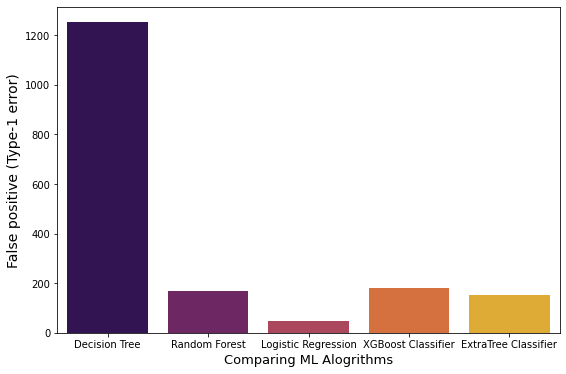

In [ ]:
# Defining the plotsize
plt.figure(figsize=(9, 6))

# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
plots = sns.barplot(x="Model", y="False Positives", data=models1, palette='inferno')

# Setting the x-acis label and its size
plt.xlabel("Comparing ML Alogrithms", size=13)

# Setting the y-axis label and its size
plt.ylabel("False positive (Type-1 error)", size=14)

# Finallt plotting the graph
plt.show()

***Seems Logistic Regression has lesser amount for this Type-1 error and become more proficient algorithm as compared to other models.***

### **False negative ("No Spammer" and predicted value "Spammer") Type-2 error**

let's visualize this to check that which model has lesser number of Type-2 error.

In [ ]:
models2 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','ExtraTree Classifier'],
                       'False negative': [cm_dt[1,0],cm_rfc[1,0],cm_lr[1,0],cm_xgb[1,0], cm_ExtraTree[1,0]]})

models2.sort_values(by='False negative', ascending=False)

,Model,False negative
2,Logistic Regression,2292
3,XGBoost Classifier,1382
4,ExtraTree Classifier,1183
1,Random Forest,1117
0,Decision Tree,1069


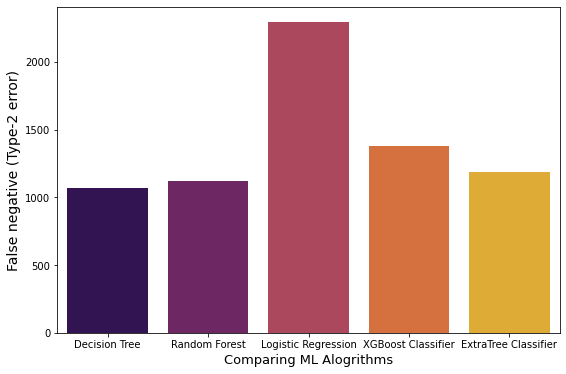

In [ ]:
# Defining the plotsize
plt.figure(figsize=(9, 6))

# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
plots = sns.barplot(x="Model", y="False negative", data=models2, palette='inferno')

# Setting the x-acis label and its size
plt.xlabel("Comparing ML Alogrithms", size=13)

# Setting the y-axis label and its size
plt.ylabel("False negative (Type-2 error)", size=14)

# Finallt plotting the graph
plt.show()

***Seems Logistic Regression has lesser amount for this Type-1 error and but here during Type-2 error Logistic have most wrong prediction in terms of spammers, although it wrongly predicted high amount of spammers as compared to other models.***

### **True negative ("Spamer" and predicted value "Spammer") True prediction**

let's visualize this to observe that which alogrithm has predicted rightly spammers

In [ ]:
models3 = pd.DataFrame({'Model': ['Decision Tree','Random Forest','Logistic Regression','XGBoost Classifier','ExtraTree Classifier'],
                       'True negative': [cm_dt[1,1],cm_rfc[1,1],cm_lr[1,1],cm_xgb[1,1], cm_ExtraTree[1,1]]})

models3.sort_values(by='True negative', ascending=False)

,Model,True negative
0,Decision Tree,1394
1,Random Forest,1346
4,ExtraTree Classifier,1280
3,XGBoost Classifier,1081
2,Logistic Regression,171


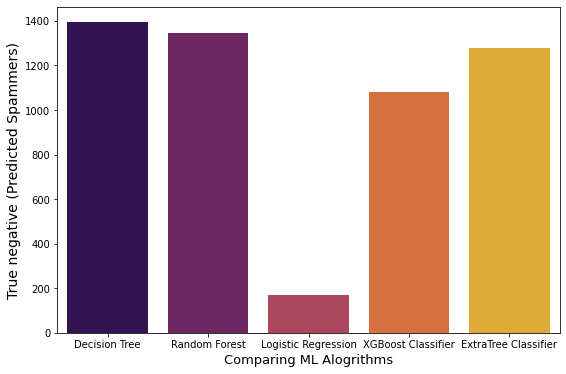

In [ ]:
# Defining the plotsize
plt.figure(figsize=(9, 6))

# Defining the x-axis, the y-axis and the data
# from where the values are to be taken
plots = sns.barplot(x="Model", y="True negative", data=models3, palette='inferno')

# Setting the x-acis label and its size
plt.xlabel("Comparing ML Alogrithms", size=13)

# Setting the y-axis label and its size
plt.ylabel("True negative (Predicted Spammers)", size=14)

# Finallt plotting the graph
plt.show()

***Here we observed that Logistic Regression failed to impress and Decision Tree along with Random Forest impress us but Decision Tree is the one who had max wrong prediction in Type-1 Error where it predicted Spammer" as "No Spammer"***

### **Conclusion : -** 

* Through-out the examination of all parameters we have noticed that **Random Forest** and **Extra Tree** were the decent and good performer, so as final answer we can choose both alogrithms **Random Forest** and **Extra Tree**. But incase to choose **one algorithm** than **Random Forest** will be good fit because it edge pass Extra Tree's spam prediction wise (True negative), also accuracy score as well. And quite effective as compared in other parameters performance wise.